In [94]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import cv2
import os
import re
import time

In [73]:
letter_train_path = 'F:/ml-data/car-num/tf_car_license_dataset/train_images/training-set/letters/'

In [93]:
def get_ch(file_name):
    ret = ''
    for ch in file_path:
        if u'\u4e00' <= ch <= u'\u9fff': 
            ret += ch
    return ret

In [106]:
def repeat_ch(file_name, ch):
    time_str = 'bk'
    file_name = file_name.replace(ch, time_str)
    return file_name
    

In [111]:
### 去除文件名中的中文--替换为bk  （存在中文字符cv2打不开）

def filename_not_ch(file_path):
    for root, dirs, files in os.walk(file_path):
         for d in dirs:
            data_dir = root + d
            for root1, dirs1, file1 in os.walk(data_dir):
                for f in file1:
                    data_img_path = data_dir + '/' + f
                    ch = get_ch(f)
                    if ch:
                        new_name = repeat_ch(f, ch)
                        new_path = data_dir + '/' + new_name
                        os.rename(data_img_path, new_path)

In [3]:
def img2arr(file_path):
    img = cv2.imread(file_path, 2)
    img_flatten = np.array(img).flatten()
    return img_flatten

In [117]:

def get_dataset(dataset_path):
    data = []
    target = []

    for root, dirs, files in os.walk(dataset_path):
        for d in dirs:
            data_dir = root + d
            label = int(d) - 10
            if label > 23:
                break;
            for root1, dirs1, file1 in os.walk(data_dir):
                for f in file1:
                    data_img_path = data_dir + '/' + f
                    data_img_flatten = img2arr(data_img_path)
                    data.append(data_img_flatten)
                    target.append(label)
    data1 = np.array(data)
    target = np.array(target)
    return data1, target

In [114]:
train_data, train_target = get_dataset(letter_train_path)

(3198, 1280)


In [115]:
train_data.shape

(3198, 1280)

In [119]:
train_target.shape

(3198,)

In [127]:
import keras
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [123]:
train_x, test_x, train_y, test_y = train_test_split(train_data, train_target, test_size = 0.2, random_state = 1)

In [124]:
train_x.shape

(2558, 1280)

In [125]:
test_x.shape

(640, 1280)

In [126]:
### 数据转换

In [129]:
IMG_HEIGHT = 40
IMG_WIDTH = 32

train_x = train_x.reshape(train_x.shape[0], IMG_HEIGHT, IMG_WIDTH, 1)/255
test_x = test_x.reshape(test_x.shape[0], IMG_HEIGHT, IMG_WIDTH, 1)/255
train_y = keras.utils.to_categorical(train_y, num_classes=24)
test_y = keras.utils.to_categorical(test_y, num_classes=24)

In [130]:
train_x.shape

(2558, 40, 32, 1)

In [131]:
test_x.shape

(640, 40, 32, 1)

In [132]:
train_y.shape

(2558, 24)

In [133]:
### 封装网络

In [134]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

In [135]:
model = Sequential()
model.add(Conv2D(50, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(160))
model.add(Activation('relu'))
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dense(24))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 32, 50)        500       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 16, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               2560160   
_________________________________________________________________
activation_1 (Activation)    (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                12880     
_________________________________________________________________
activation_2 (Activation)    (None, 80)              

In [136]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
history = model.fit(train_x, train_y, batch_size=200, epochs=15, validation_data=(test_x, test_y), workers=-1)


Train on 2558 samples, validate on 640 samples
Epoch 1/15
2558/2558 [==============================] - 2s 864us/step - loss: 1.8913 - accuracy: 0.4965 - val_loss: 0.7471 - val_accuracy: 0.8219
Epoch 2/15
2558/2558 [==============================] - 2s 780us/step - loss: 0.3484 - accuracy: 0.9308 - val_loss: 0.1109 - val_accuracy: 0.9859
Epoch 3/15
2558/2558 [==============================] - 2s 832us/step - loss: 0.0556 - accuracy: 0.9914 - val_loss: 0.0358 - val_accuracy: 0.9922
Epoch 4/15
2558/2558 [==============================] - 2s 778us/step - loss: 0.0188 - accuracy: 0.9969 - val_loss: 0.0233 - val_accuracy: 0.9953
Epoch 5/15
2558/2558 [==============================] - 2s 818us/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.0144 - val_accuracy: 0.9969
Epoch 6/15
2558/2558 [==============================] - 2s 787us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9969
Epoch 7/15
2558/2558 [==============================] - 2s 782us/step - loss

In [141]:
sample = test_x[:32]
sample.shape

(32, 40, 32, 1)

In [154]:
letter_dict = {
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'J',
    9:'K',
    10:'L',
    11:'M',
    12:'N',
    13:'P',
    14:'Q',
    15:'R',
    16:'S',
    17:'T',
    18:'U',
    19:'V',
    20:'W',
    21:'X',
    22:'Y',
    23:'Z'
}

In [147]:
def plot_letter_predict(data, predict):
    plt.figure(figsize=(10,8))
    for i in range(len(data)):
        plt.subplot(4, 8, i +1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(data[i].reshape(40,32), cmap="binary",  interpolation = 'nearest')
        plt.title('predict: {}'.format(letter_dict[predict[i]]))

In [157]:
predict_y = model.predict_classes(sample)
predict_y

array([ 0, 17, 15,  9,  1,  1,  0, 23,  0,  2,  1, 14, 13, 15, 11,  0,  8,
       20,  2, 17, 19,  5, 23,  0,  0,  1,  4,  6, 11,  6,  6,  0],
      dtype=int64)

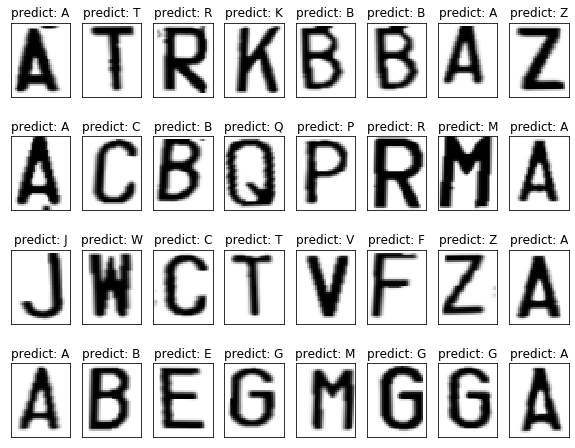

In [158]:
plot_letter_predict(sample, predict_y)